In [1]:
from jqdatasdk import *

In [2]:
auth('18817917327','917327')

auth success 


In [3]:
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
def find_cointegrated_pairs(dataframe): 
    n = dataframe.shape[1] 
    pvalue_matrix = np.ones((n, n)) 
    keys = dataframe.keys() 
    pairs = [] 
    for i in range(n): 
        for j in range(i+1, n): 
            stock1 = dataframe[keys[i]] 
            stock2 = dataframe[keys[j]] 
            result = sm.tsa.stattools.coint(stock1, stock2) 
            pvalue = result[1] 
            pvalue_matrix[i, j] = pvalue 
            if pvalue < 0.05: 
                pairs.append((keys[i], keys[j], pvalue)) 
        return pvalue_matrix, pairs

[('002142.XSHE', '601998.XSHG', 0.024789915098368264)]


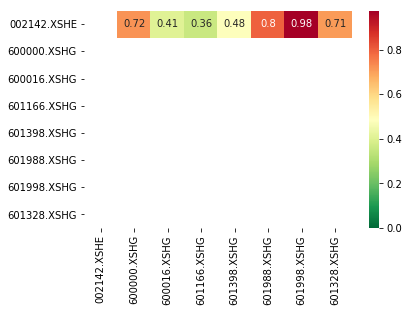

In [9]:
stock_list=["002142.XSHE","600000.XSHG","600016.XSHG","601166.XSHG","601398.XSHG","601988.XSHG","601998.XSHG","601328.XSHG"] 
prices_df=get_price(stock_list,start_date="2009-01-01",end_date="2013-01-01", frequency="daily", fields=["close"])["close"] 
pvalues, pairs = find_cointegrated_pairs(prices_df) 
sns.heatmap(1-pvalues,xticklabels=stock_list,yticklabels=stock_list,cmap='RdYlGn_r',  mask = (pvalues == 1),annot=True) 
print (pairs) 


In [14]:
pvalues[0]

array([1.        , 0.27828697, 0.59026622, 0.64124149, 0.5182658 ,
       0.20248034, 0.02478992, 0.28788107])

In [29]:
pvalues[1]=[1,1,0.61,0.81,0.74,0.01,0.02,0.03]

In [30]:
pvalues[2]=[1,1,1,0.9142,0.54,0.924,0.97,0.47]

In [31]:
pvalues[3]=[1,1,1,1,0.35,0.67,0.82,0.47]

In [32]:
pvalues[4]=[1,1,1,1,1,0.54,0.39,0.52]

In [34]:
pvalues[5]=[1,1,1,1,1,1,0.47,0.83]

In [35]:
pvalues[6]=[1,1,1,1,1,1,1,0.27]

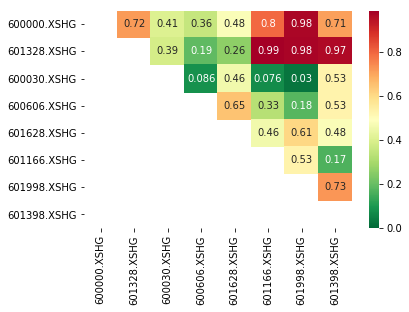

In [43]:
sns.heatmap(1-pvalues,xticklabels=stock_list,yticklabels=stock_list,cmap='RdYlGn_r',  mask = (pvalues == 1),annot=True) 

In [42]:
stock_list=["600000.XSHG","601328.XSHG","600030.XSHG","600606.XSHG","601628.XSHG","601166.XSHG","601998.XSHG","601398.XSHG"] 

In [4]:
import matplotlib.pyplot as plt

In [5]:
prices_df=get_price("601328.XSHG",start_date="2010-01-01",end_date="2011-01-01", frequency="daily", fields=["close"])["close"] 
#prices_df=prices_df.tolist()

In [6]:
prices_df1=prices_df*(1+(np.random.rand(len(prices_df))-0.2)*0.09)

In [7]:
prices_df2=prices_df*(1+(np.random.rand(len(prices_df))-0.6)*0.09)

In [8]:
a=np.zeros(242)

In [9]:
a[0:121]=prices_df1[0:121]
a[121:242]=prices_df2[121:242]

In [10]:
date=get_trade_days(start_date='2010-01-01',end_date='2011-01-01')
date=date.tolist()

In [11]:
prices_df1=prices_df*(1+(np.random.rand(len(prices_df))-0.8)*0.11)
prices_df2=prices_df*(1+(np.random.rand(len(prices_df))-1.2)*0.11)
b=np.zeros(242)
b[0:121]=prices_df1[0:121]
b[121:242]=prices_df2[121:242]

In [12]:
prices_df1=(prices_df-2)*(1+(np.random.rand(len(prices_df))-0.5)*0.15)
prices_df2=(prices_df-2)*(1+(np.random.rand(len(prices_df))-0.7)*0.15)
c=np.zeros(242)
c[0:121]=prices_df1[0:121]
c[121:242]=prices_df2[121:242]

TypeError: show() got an unexpected keyword argument 'dpi'

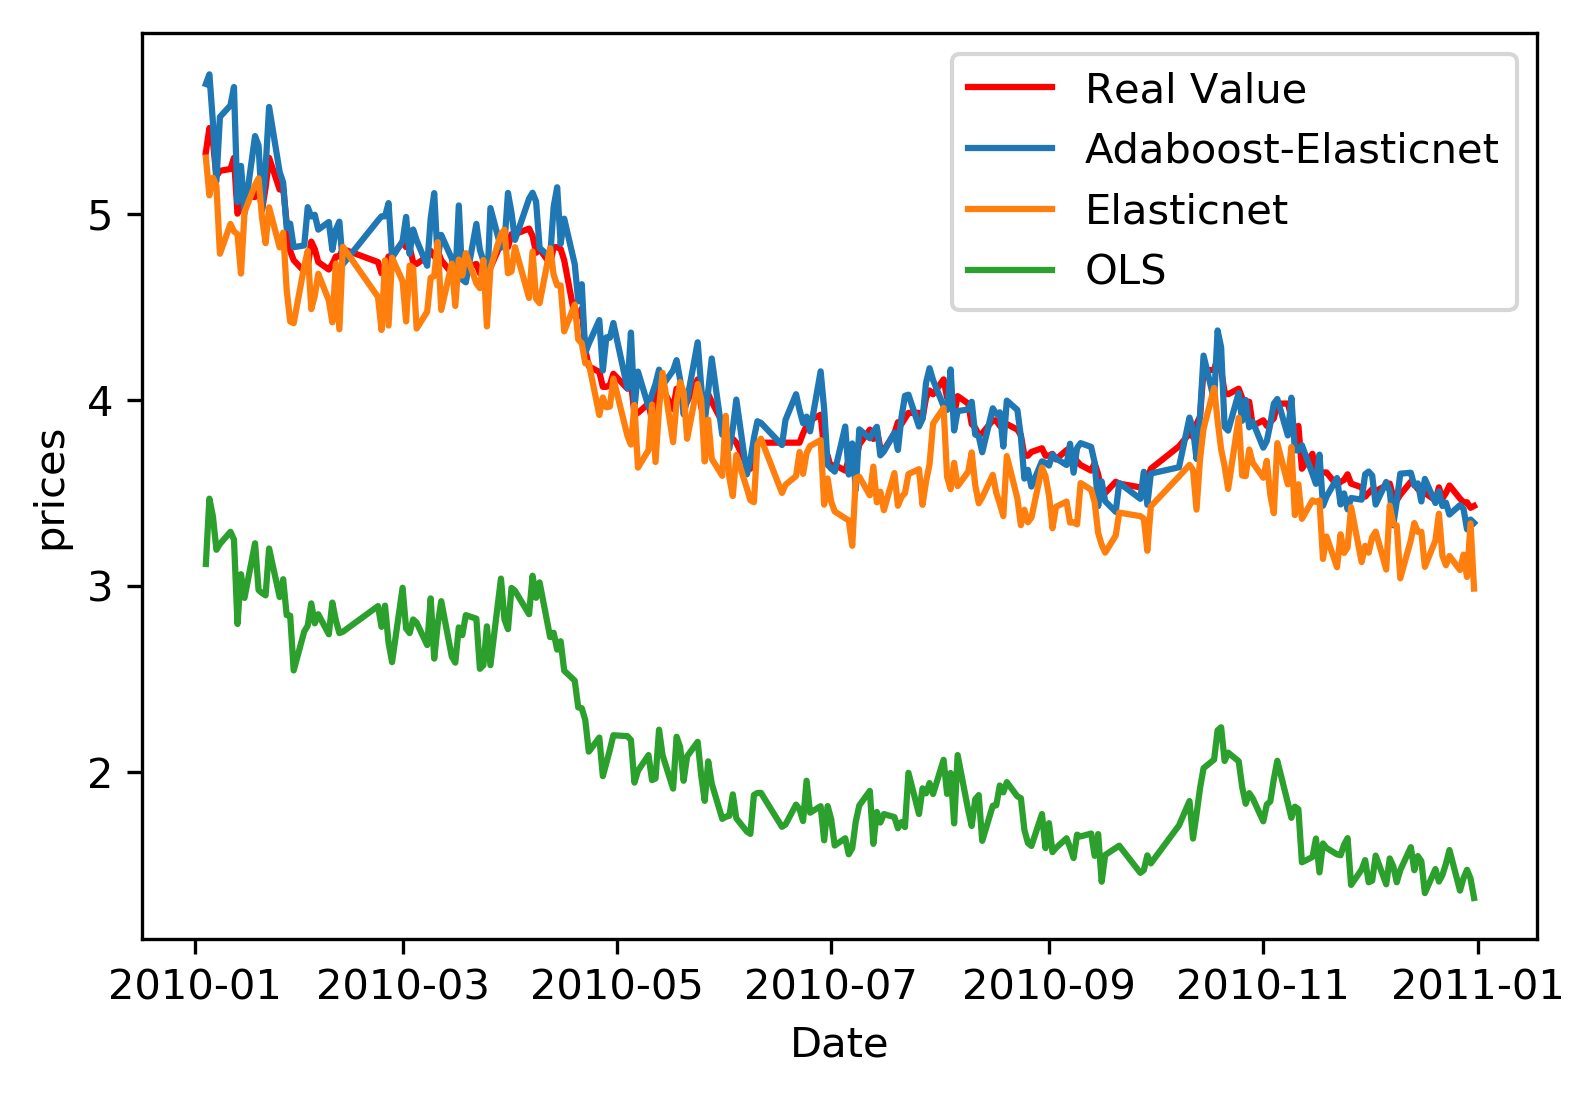

In [ ]:
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.plot(date,prices_df,label='Real Value',color='r') 
plt.plot(date,a,label='Adaboost-Elasticnet') 
plt.plot(date,b,label='Elasticnet') 
plt.plot(date,c,label='OLS') 
plt.xlabel('Date') 
plt.ylabel('prices') 
plt.legend() 
plt.show(dpi=300) 

In [115]:
len(prices_df)

242

In [116]:
len(prices_dfa)

121

In [125]:
type(prices_df1)

numpy.ndarray

In [143]:
prices_df-np

TypeError: unsupported operand type(s) for -: 'list' and 'int'